In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocess transactional data

Going to drop any personal account-to-personal account transactions and just keep the business payments

In [3]:
bank_max = pd.read_csv('mapped_df.csv')

In [4]:
bank_max.head()

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,group
0,10371.0,4.00,CINEMA,01/01/2025,Cinema
1,88339.0,2.40,40544,01/01/2025,Personal Accounts
2,18555.0,2.40,85149,01/01/2025,Personal Accounts
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025,Cafe
4,80792.0,1.95,18555,01/01/2025,Personal Accounts


In [5]:
# drop row with NaN in 'group' column - remove C2C transactions
# Only store C2B transactions
bank = bank_max.dropna(subset=['group'])

bank.head()

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,group
0,10371.0,4.00,CINEMA,01/01/2025,Cinema
1,88339.0,2.40,40544,01/01/2025,Personal Accounts
2,18555.0,2.40,85149,01/01/2025,Personal Accounts
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025,Cafe
4,80792.0,1.95,18555,01/01/2025,Personal Accounts


In [6]:
# filter for dataframe with 'from_totally_fake_account' == 10371
bank_id= bank[bank['from_totally_fake_account'] == 10371.0]

# drop 'to_randomly_generated_account' column
bank_id = bank_id.drop(columns=['to_randomly_generated_account','not_happened_yet_date'])

bank_id.head(7)

,from_totally_fake_account,monopoly_money_amount,group
0,10371.0,4.00,Cinema
8107,10371.0,1.45,Cafe
8109,10371.0,2.55,Cafe
8118,10371.0,2.65,Cafe
18537,10371.0,8.99,Streaming Service
29117,10371.0,2.20,Cafe
29120,10371.0,2.65,Cafe


In [7]:
print(bank_id.index)

Index([       0,     8107,     8109,     8118,    18537,    29117,    29120,
          59058,    59059,    59060,
       ...
       10040652, 10087270, 10103854, 10103856, 10103857, 10121181, 10139127,
       10139128, 10139141, 10139159],
      dtype='int64', length=1653)


## Pivot to compute average spend per category - for a single account number

In [8]:
bank_id_pivoted = bank_id.pivot_table(index='from_totally_fake_account',
                                columns='group',
                                values='monopoly_money_amount',
                                aggfunc='mean')

bank_id_pivoted.head(20)

group,Alcohol Store,Bar,Cafe,Cinema,Fast Food,Gaming,Home,Personal Accounts,Pets,Pub,Restaurant/Takeaway,Roasterie/Tea Shop,Streaming Service,Supermarket
from_totally_fake_account,,,,,,,,,,,,,,
10371.0,16.995,12.316062,2.413517,6.451613,3.928571,43.0,47.0,28.799837,20.25,13.87063,30.227917,22.0425,8.99,96.84942


## Pivot for every account number

In [9]:
bank_category_pivoted = bank.pivot_table(index='from_totally_fake_account',
                                columns='group',
                                values='monopoly_money_amount',
                                aggfunc='mean')

bank_category_pivoted.shape

(8142, 27)

- Dataframe has the correct number of rows for each person.

In [10]:
bank_category_pivoted.head(10)

group,Accessory Shop,Alcohol Store,Bar,Book Store,Butcher,Cafe,Children's Shop,Cinema,Clothing Store,Cook Shop,...,Personal Accounts,Pets,Pub,Restaurant/Takeaway,Roasterie/Tea Shop,Sports Store,Streaming Service,Supermarket,Tech Store,Turkey Farm
from_totally_fake_account,,,,,,,,,,,,,,,,,,,,,
1000.0,NaN,38.326667,11.895753,8.000000,NaN,2.404920,80.000000,6.146341,145.000000,NaN,...,48.568133,25.190476,15.157426,34.327447,22.726667,NaN,8.99,85.241250,NaN,NaN
1002.0,NaN,51.656667,11.846698,NaN,NaN,2.348301,67.000000,6.180000,NaN,NaN,...,18.373011,NaN,16.369496,31.992979,20.606667,87.500000,8.99,95.055455,NaN,NaN
1006.0,NaN,21.590000,11.776316,11.444444,21.521449,2.428012,59.200000,5.820513,65.000000,16.555556,...,14.106597,NaN,15.574400,30.310769,31.360000,NaN,8.99,20.693333,NaN,NaN
1018.0,NaN,19.995000,5.955986,10.000000,21.617021,2.507692,59.000000,5.600000,118.176471,NaN,...,36.505932,30.000000,6.400000,34.061923,26.365000,84.000000,NaN,23.003929,NaN,NaN
1053.0,NaN,59.990000,11.774510,NaN,18.000000,2.688333,33.250000,6.166667,111.347826,NaN,...,20.538599,NaN,13.153661,19.236889,31.817500,115.000000,8.99,86.093846,79.0,NaN
1059.0,NaN,10.000000,12.035294,10.434783,NaN,2.392663,50.764706,4.000000,128.000000,NaN,...,20.803252,NaN,15.006667,35.029767,34.015000,68.666667,NaN,67.843125,NaN,NaN
1071.0,NaN,36.990000,6.470370,17.500000,30.000000,2.473515,13.000000,6.968750,NaN,23.000000,...,28.956993,NaN,10.407987,33.524390,22.120000,68.384615,8.99,100.036667,235.5,NaN
1078.0,NaN,16.995000,12.070621,NaN,15.923077,2.397773,49.642857,6.523810,NaN,13.333333,...,6.222300,NaN,15.547470,31.175111,39.090000,80.500000,8.99,90.596557,NaN,NaN
1086.0,NaN,56.790000,5.773529,12.500000,22.218182,2.470244,52.045455,6.243902,116.600000,NaN,...,34.655145,60.000000,11.298896,31.097143,38.033333,117.000000,8.99,23.457083,NaN,NaN


- Can see NaNs where people haven't spent money.
- Replace these values with £0.

In [11]:
# replace NaN with 0
bank_category_pivoted_final = bank_category_pivoted.fillna(0)
bank_category_pivoted_final.head(10)

group,Accessory Shop,Alcohol Store,Bar,Book Store,Butcher,Cafe,Children's Shop,Cinema,Clothing Store,Cook Shop,...,Personal Accounts,Pets,Pub,Restaurant/Takeaway,Roasterie/Tea Shop,Sports Store,Streaming Service,Supermarket,Tech Store,Turkey Farm
from_totally_fake_account,,,,,,,,,,,,,,,,,,,,,
1000.0,0.0,38.326667,11.895753,8.000000,0.000000,2.404920,80.000000,6.146341,145.000000,0.000000,...,48.568133,25.190476,15.157426,34.327447,22.726667,0.000000,8.99,85.241250,0.0,0.0
1002.0,0.0,51.656667,11.846698,0.000000,0.000000,2.348301,67.000000,6.180000,0.000000,0.000000,...,18.373011,0.000000,16.369496,31.992979,20.606667,87.500000,8.99,95.055455,0.0,0.0
1006.0,0.0,21.590000,11.776316,11.444444,21.521449,2.428012,59.200000,5.820513,65.000000,16.555556,...,14.106597,0.000000,15.574400,30.310769,31.360000,0.000000,8.99,20.693333,0.0,0.0
1018.0,0.0,19.995000,5.955986,10.000000,21.617021,2.507692,59.000000,5.600000,118.176471,0.000000,...,36.505932,30.000000,6.400000,34.061923,26.365000,84.000000,0.00,23.003929,0.0,0.0
1053.0,0.0,59.990000,11.774510,0.000000,18.000000,2.688333,33.250000,6.166667,111.347826,0.000000,...,20.538599,0.000000,13.153661,19.236889,31.817500,115.000000,8.99,86.093846,79.0,0.0
1059.0,0.0,10.000000,12.035294,10.434783,0.000000,2.392663,50.764706,4.000000,128.000000,0.000000,...,20.803252,0.000000,15.006667,35.029767,34.015000,68.666667,0.00,67.843125,0.0,0.0
1071.0,0.0,36.990000,6.470370,17.500000,30.000000,2.473515,13.000000,6.968750,0.000000,23.000000,...,28.956993,0.000000,10.407987,33.524390,22.120000,68.384615,8.99,100.036667,235.5,0.0
1078.0,0.0,16.995000,12.070621,0.000000,15.923077,2.397773,49.642857,6.523810,0.000000,13.333333,...,6.222300,0.000000,15.547470,31.175111,39.090000,80.500000,8.99,90.596557,0.0,0.0
1086.0,0.0,56.790000,5.773529,12.500000,22.218182,2.470244,52.045455,6.243902,116.600000,0.000000,...,34.655145,60.000000,11.298896,31.097143,38.033333,117.000000,8.99,23.457083,0.0,0.0


## UMAP + HDBSCAN - Average spend per category features

In [13]:
import umap

In [83]:
# pre-process data so that it's scaled to 1 for each individual

bank_avg_scaled = bank_category_pivoted_final.div(bank_category_pivoted_final.sum(axis=1), axis=0)

# column wise sum - each individual's total spend sums to 1  
sum_column = bank_avg_scaled.sum(axis=1)
#sum_column

bank_avg_scaled.head(10)

group,Accessory Shop,Alcohol Store,Bar,Book Store,Butcher,Cafe,Children's Shop,Cinema,Clothing Store,Cook Shop,...,Personal Accounts,Pets,Pub,Restaurant/Takeaway,Roasterie/Tea Shop,Sports Store,Streaming Service,Supermarket,Tech Store,Turkey Farm
from_totally_fake_account,,,,,,,,,,,,,,,,,,,,,
1000.0,0.0,0.060345,0.018730,0.012596,0.000000,0.003787,0.125959,0.009677,0.228301,0.000000,...,0.076470,0.039662,0.023865,0.054048,0.035783,0.000000,0.014155,0.134212,0.000000,0.0
1002.0,0.0,0.111906,0.025664,0.000000,0.000000,0.005087,0.145145,0.013388,0.000000,0.000000,...,0.039802,0.000000,0.035462,0.069308,0.044641,0.189555,0.019475,0.205923,0.000000,0.0
1006.0,0.0,0.048424,0.026413,0.025669,0.048271,0.005446,0.132780,0.013055,0.145789,0.037133,...,0.031640,0.000000,0.034932,0.067984,0.070338,0.000000,0.020164,0.046413,0.000000,0.0
1018.0,0.0,0.027427,0.008170,0.013717,0.029652,0.003440,0.080931,0.007682,0.162104,0.000000,...,0.050076,0.041151,0.008779,0.046723,0.036165,0.115224,0.000000,0.031555,0.000000,0.0
1053.0,0.0,0.073939,0.014512,0.000000,0.022185,0.003313,0.040981,0.007601,0.137238,0.000000,...,0.025314,0.000000,0.016212,0.023710,0.039216,0.141739,0.011080,0.106112,0.097369,0.0
1059.0,0.0,0.019595,0.023583,0.020447,0.000000,0.004688,0.099473,0.007838,0.250814,0.000000,...,0.040764,0.000000,0.029405,0.068640,0.066652,0.134551,0.000000,0.132938,0.000000,0.0
1071.0,0.0,0.051960,0.009089,0.024582,0.042141,0.003475,0.018261,0.009789,0.000000,0.032308,...,0.040676,0.000000,0.014620,0.047092,0.031072,0.096060,0.012628,0.140522,0.330807,0.0
1078.0,0.0,0.035978,0.025553,0.000000,0.033709,0.005076,0.105092,0.013811,0.000000,0.028226,...,0.013172,0.000000,0.032913,0.065997,0.082752,0.170416,0.019032,0.191790,0.000000,0.0
1086.0,0.0,0.070072,0.007124,0.015423,0.027415,0.003048,0.064218,0.007704,0.143870,0.000000,...,0.042760,0.074033,0.013941,0.038370,0.046929,0.144364,0.011093,0.028943,0.000000,0.0


In [84]:
# convert to numpy array
bank_avg_spend_umap = bank_category_pivoted_final.to_numpy()
print(f'Shape of average spend dataset',bank_avg_spend_umap.shape)

# apply UMAP
umap_reducer = umap.UMAP(
    n_neighbors=20, #400
    min_dist=0.1, # 0.05
)
embedding = umap_reducer.fit_transform(bank_avg_spend_umap)

Shape of average spend dataset (8142, 27)


C:\Users\donjo\AppData\Local\Temp\ipykernel_11732\1990594939.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


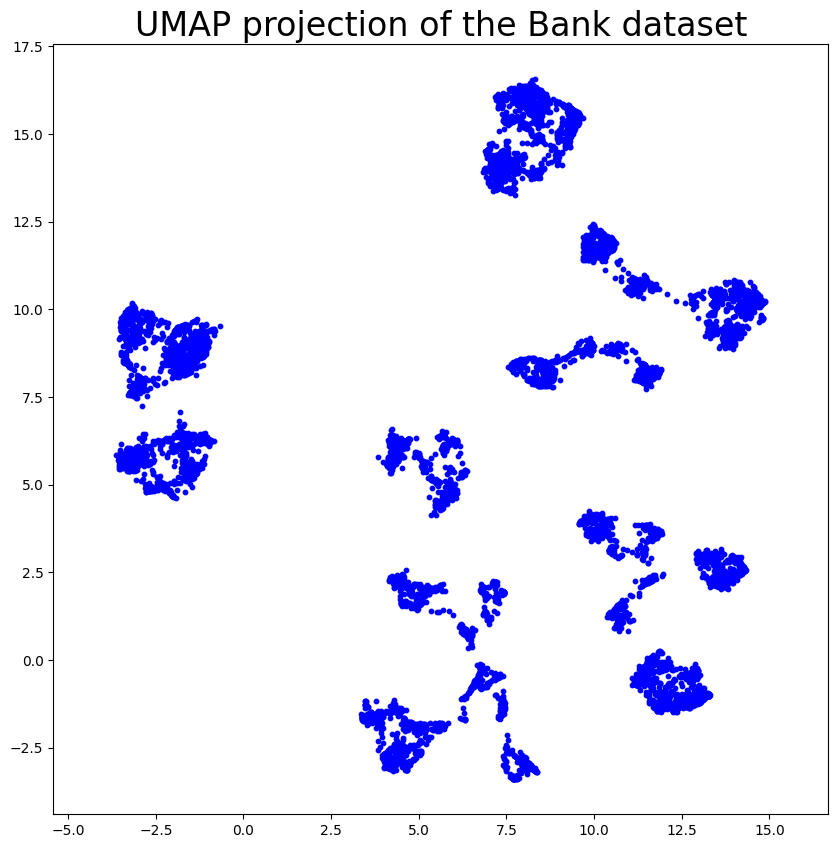

In [85]:
# plot UMAP
plt.figure(figsize=(10, 10))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c='blue',
    cmap='Spectral',
    s=10
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Bank dataset', fontsize=24);


In [92]:
# get HDBSCAN from sklearn
from sklearn.cluster import HDBSCAN
hdb = HDBSCAN(
    min_samples=10,
    min_cluster_size=350,
)

# fit HDBSCAN
hdb_clusters = hdb.fit_predict(embedding)

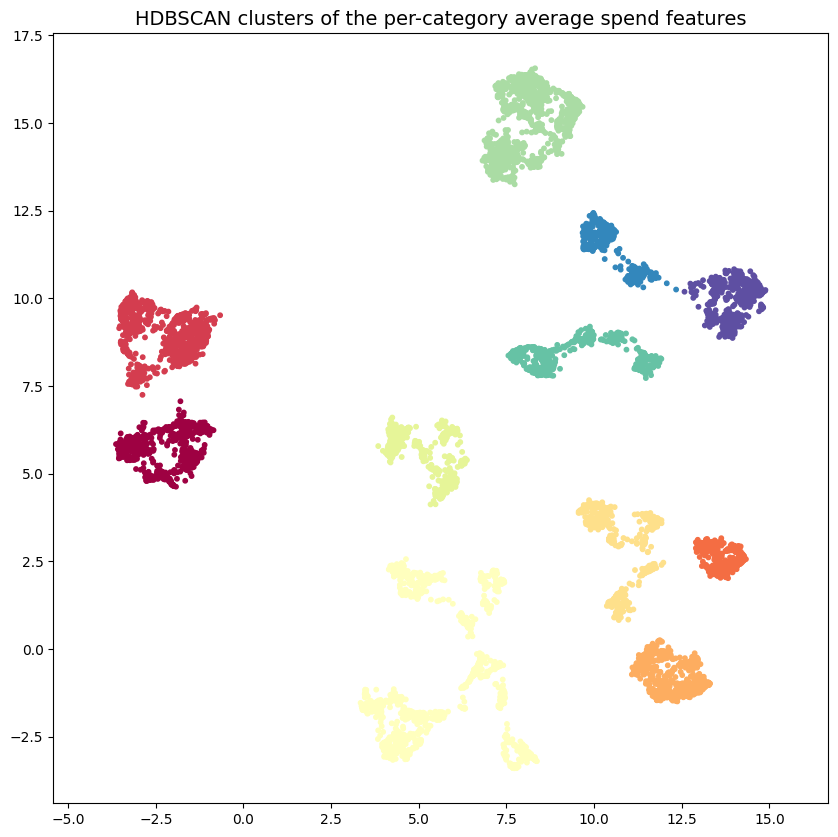

Silhouette score for clusters:  0.6054806


In [93]:
# plot HDBSCAN
plt.figure(figsize=(10, 10))

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=hdb_clusters,
    cmap='Spectral',
    s=10
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('HDBSCAN clusters of the per-category average spend features', fontsize=14);
plt.show()

# get silhouette score
from sklearn.metrics import silhouette_score
print(f'Silhouette score for clusters: ',silhouette_score(embedding, hdb_clusters))